In [2]:
'''This scipt blurs Russian number plates using a Russian plate Haarcascade xml'''

import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
img = cv2.imread('../DATA/car_plate.jpg')

In [39]:
# Shows images more easily and color corrected
def display(img,cmap=None):
    fig = plt.figure(figsize=(24,12))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img,cmap=cmap)

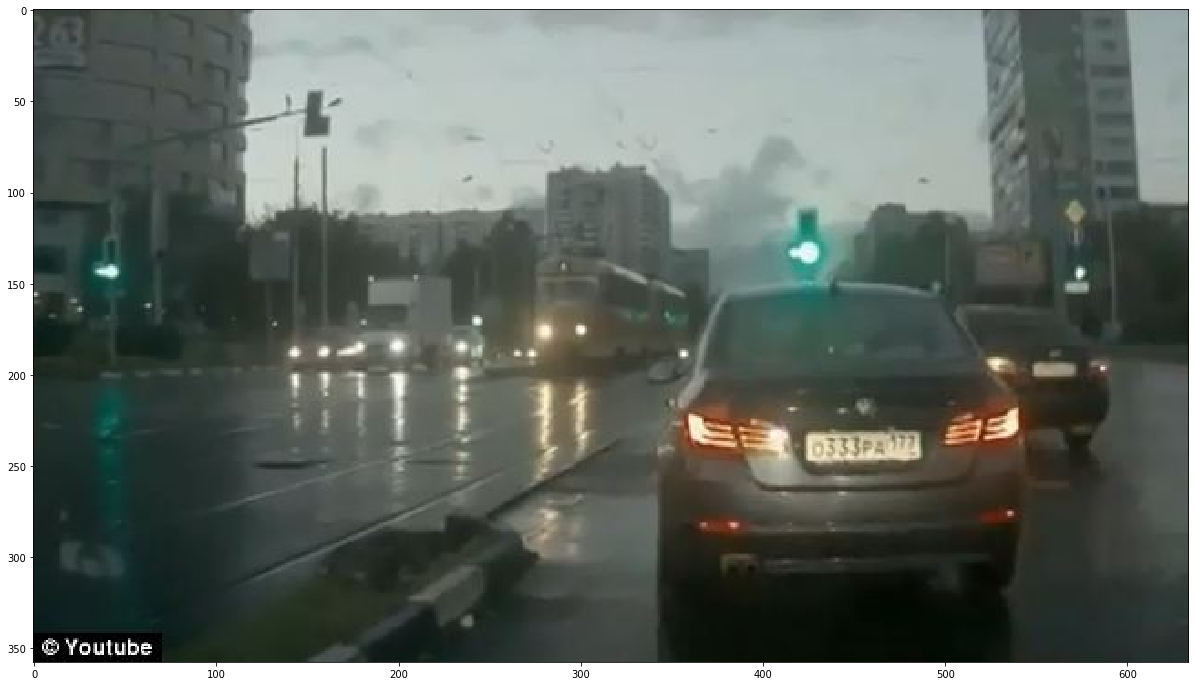

In [40]:
display(img)

In [41]:
# Importing number plate blurring xml cascade

In [44]:
car_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [167]:
# This function detects plates (no blur)
def detect_car(img):
    
  
    car_img = img.copy()
  
    car_rects = car_cascade.detectMultiScale(car_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in car_rects: 
        cv2.rectangle(car_img, (x,y), (x+w,y+h), (0,255,0), 1) 
        
    return car_img

In [168]:
result = detect_car(car_img)

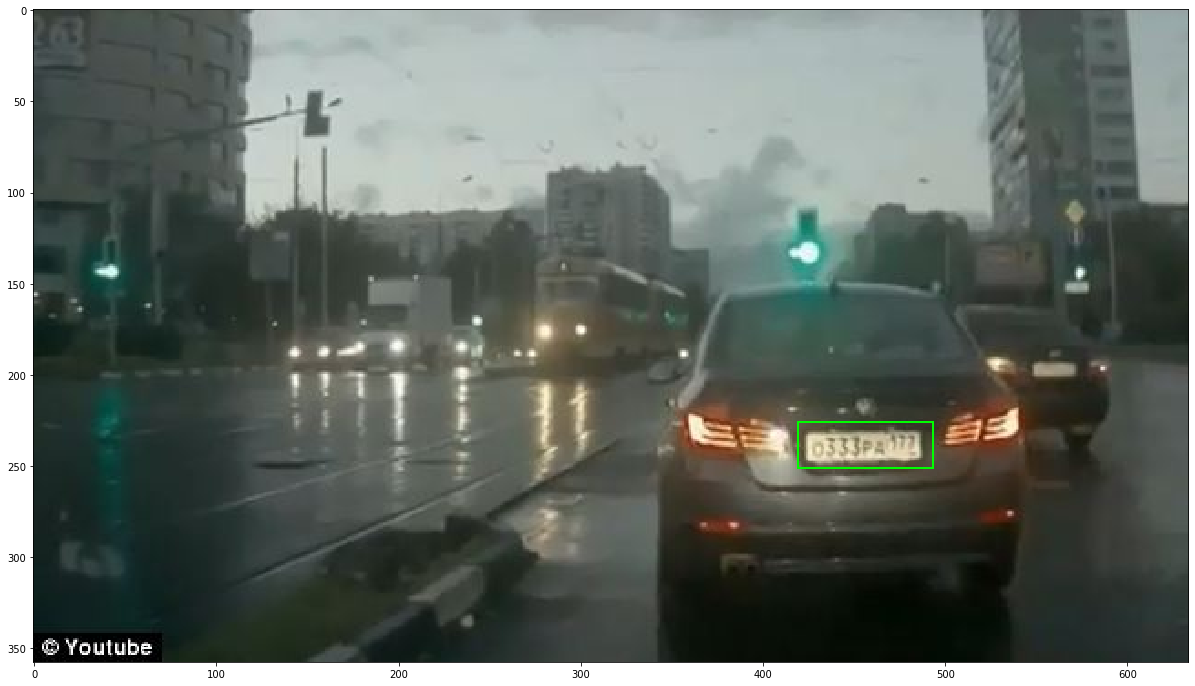

In [169]:
display(result)

In [170]:
result.shape

(358, 634, 3)

In [172]:
# This function detects the plate, blurs it, and replaces the region of interest (ROI) in original image with the blur
def blur_plate(img):
    
  
    car_img = img.copy()
  
    car_rects = car_cascade.detectMultiScale(car_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in car_rects: 
        roi = img[y:y+h, x:x+w] # Select region of interest as 
        blurred_roi = cv2.GaussianBlur(roi,(5,5),10)
        img[y:y+h,x:x+w] = blurred_roi
    return car_img

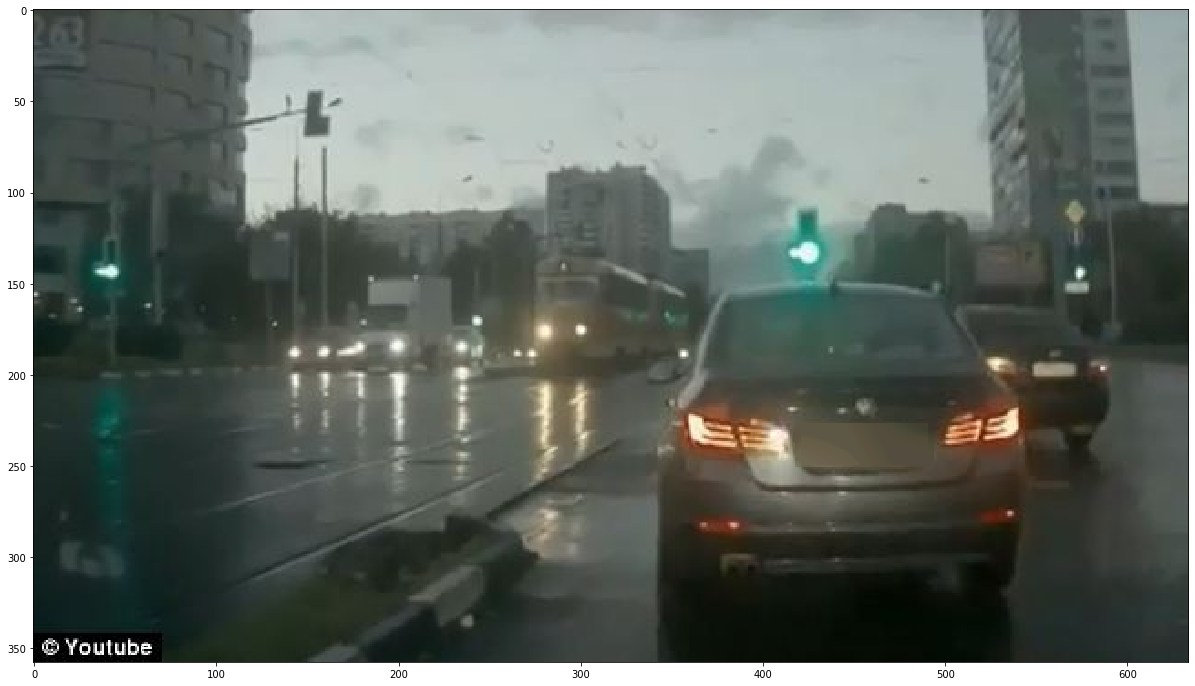

In [173]:
display(blur_plate(img))